In [1]:
##Example 1
# Get the list from the user
user_input = input("Enter numbers separated by spaces: ")
simple_list = list(map(float, user_input.split()))

# Define the window size for the moving average
window_size = int(input("Enter the window size for the moving average: "))

# Calculate the moving average
moving_averages = []
for i in range(len(simple_list) - window_size + 1):
    window = simple_list[i:i + window_size]
    window_average = sum(window) / window_size
    moving_averages.append(window_average)

# Display the results
print(f"Original List: {simple_list}")
print(f"Moving Averages: {moving_averages}")

Enter numbers separated by spaces: 4 8 12 16 20 24 32 36 40
Enter the window size for the moving average: 3
Original List: [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 32.0, 36.0, 40.0]
Moving Averages: [8.0, 12.0, 16.0, 20.0, 25.333333333333332, 30.666666666666668, 36.0]


In [2]:
##Example 2
# Get the list from the user
user_input = input("Enter numbers separated by spaces: ")
simple_list = list(map(float, user_input.split()))

# Define the window size for the moving average
window_size = int(input("Enter the window size for the moving average: "))

# Calculate the moving average
moving_averages = []
for i in range(len(simple_list) - window_size + 1):
    window = simple_list[i:i + window_size]
    window_average = sum(window) / window_size
    moving_averages.append(window_average)

# Display the results
print(f"Original List: {simple_list}")
print(f"Moving Averages: {moving_averages}")

Enter numbers separated by spaces: 5 10 15 20 25 30 35 40 45 50
Enter the window size for the moving average: 4
Original List: [5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0]
Moving Averages: [12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5]


In [3]:
##Example 3
# Get the list from the user
user_input = input("Enter numbers separated by spaces: ")
simple_list = list(map(float, user_input.split()))

# Define the window size for the moving average
window_size = int(input("Enter the window size for the moving average: "))

# Calculate the moving average
moving_averages = []
for i in range(len(simple_list) - window_size + 1):
    window = simple_list[i:i + window_size]
    window_average = sum(window) / window_size
    moving_averages.append(window_average)

# Display the results
print(f"Original List: {simple_list}")
print(f"Moving Averages: {moving_averages}")

Enter numbers separated by spaces: 11 22 33 44 55 66 77 88 99 110
Enter the window size for the moving average: 2
Original List: [11.0, 22.0, 33.0, 44.0, 55.0, 66.0, 77.0, 88.0, 99.0, 110.0]
Moving Averages: [16.5, 27.5, 38.5, 49.5, 60.5, 71.5, 82.5, 93.5, 104.5]


In [4]:
##Example 4
# Get the list from the user
user_input = input("Enter numbers separated by spaces: ")
simple_list = list(map(float, user_input.split()))

# Define the window size for the moving average
window_size = int(input("Enter the window size for the moving average: "))

# Calculate the moving average
moving_averages = []
for i in range(len(simple_list) - window_size + 1):
    window = simple_list[i:i + window_size]
    window_average = sum(window) / window_size
    moving_averages.append(window_average)

# Display the results
print(f"Original List: {simple_list}")
print(f"Moving Averages: {moving_averages}")

Enter numbers separated by spaces: 9 18 27 36 45 54 63 72 81 90
Enter the window size for the moving average: 3
Original List: [9.0, 18.0, 27.0, 36.0, 45.0, 54.0, 63.0, 72.0, 81.0, 90.0]
Moving Averages: [18.0, 27.0, 36.0, 45.0, 54.0, 63.0, 72.0, 81.0]


In [5]:
import pandas as pd
attrition_data = pd.read_csv("attrition_data.csv")
attrition_data.head(5)

,Year,Attrition Rate
0,2011,10
1,2012,11
2,2013,12
3,2014,13
4,2015,15


In [6]:
#ADF Test on stationary series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
series = attrition_data['Attrition Rate']
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

C:\Users\SREJITA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ADF Statistic: -0.6423640548375108
p-value: 0.8611193437632665
Critial Values:
   1%, -4.473135048010974
Critial Values:
   5%, -3.28988060356653
Critial Values:
   10%, -2.7723823456790124


p-value>0.05 so  we cannot reject the null hypothesis .so the series is not stationary

In [8]:
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Convert the Year column to datetime format for index
attrition_data['Year'] = pd.to_datetime(attrition_data['Year'], format='%Y')
attrition_data.set_index('Year', inplace=True)
attrition_data.head(2)

,Attrition Rate
Year,
2011-01-01,10
2012-01-01,11


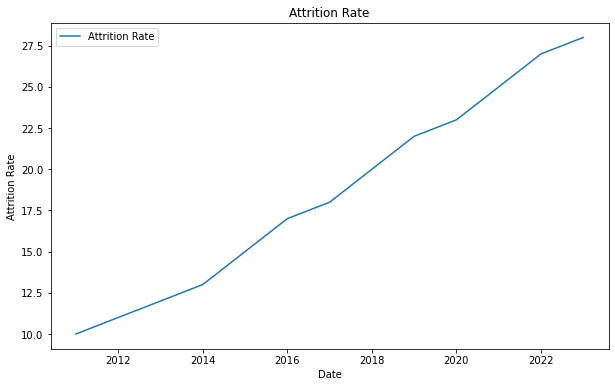

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(attrition_data.index, attrition_data['Attrition Rate'], label='Attrition Rate')
plt.title('Attrition Rate')
plt.xlabel('Date')
plt.ylabel('Attrition Rate')
plt.legend()
plt.show()

In [21]:
model = AutoReg(attrition_data['Attrition Rate'], lags=3)
model_fit = model.fit()

# Print the model summary
print("\nAR Model Summary:")
print(model_fit.summary())


AR Model Summary:
                            AutoReg Model Results                             
Dep. Variable:         Attrition Rate   No. Observations:                   13
Model:                     AutoReg(3)   Log Likelihood                  -4.999
Method:               Conditional MLE   S.D. of innovations              0.399
Date:                Mon, 09 Sep 2024   AIC                             19.999
Time:                        23:40:40   BIC                             21.512
Sample:                    01-01-2014   HQIC                            18.339
                         - 01-01-2023                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.3633      0.603      3.921      0.000       1.182       3.545
Attrition Rate.L1     0.5966      0.284      2.099      0.036       0.039       1.154
Attri

C:\Users\SREJITA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


C:\Users\SREJITA\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


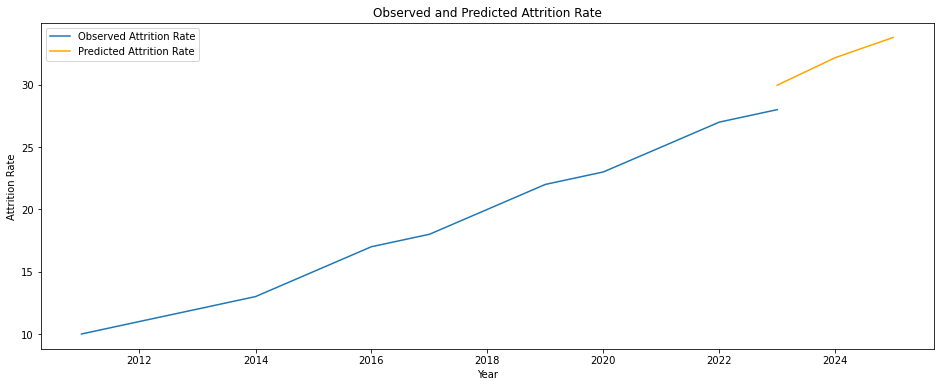

In [22]:

predictions = model_fit.predict(start=len(attrition_data), end=len(attrition_data) + 2, dynamic=False)


last_year = attrition_data.index[-1].year
prediction_years = pd.date_range(start=f'{last_year -1}', periods=3, freq='Y')   #window size=periods
predictions_df = pd.DataFrame({'Year': prediction_years, 'PredictedAttritionRate': predictions})
predictions_df.set_index('Year', inplace=True)


plt.figure(figsize=(16, 6))
plt.plot(attrition_data.index, attrition_data['Attrition Rate'], label='Observed Attrition Rate')
plt.plot(predictions_df.index, predictions_df['PredictedAttritionRate'], label='Predicted Attrition Rate', color='orange')
plt.title('Observed and Predicted Attrition Rate')
plt.xlabel('Year')
plt.ylabel('Attrition Rate')
plt.legend()
plt.show()

In [28]:
# Forecasting using moving average method
window_size = 3  # Choose window size for moving average
forecast_years = range(2024, 2028)

# Calculate moving average
attrition_data['Moving Average'] = attrition_data['Attrition Rate'].rolling(window=window_size).mean()

# Forecast attrition rate for 2024-2026
forecasted_attrition = attrition_data['Moving Average'].iloc[-1]  # Use the last available moving average for forecasting
forecasted_data = pd.DataFrame({'Year': forecast_years, 'Forecasted Attrition Rate': forecasted_attrition})

# Display forecasted data
print(forecasted_data)



   Year  Forecasted Attrition Rate
0  2024                  26.666667
1  2025                  26.666667
2  2026                  26.666667
3  2027                  26.666667
